# **Hands On Graph Neural Networks Using Python  -  CHAPTER 3**

- This project demonstrates various concepts in natural language processing (NLP)
and network analysis, including text preprocessing, word embedding generation
with Word2Vec, random walks on graphs, and node classification in the Karate Club graph.

- It includes the creation and visualization of an Erdos-Renyi graph,
skipgram generation from text, and training of Word2Vec models on both text and
random walks. The project concludes with a TSNE visualization of node embeddings and classification using a RandomForestClassifier.






In [22]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [23]:
np.random.seed(0)
CONTEXT_SIZE = 2
text = """Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc eu sem
scelerisque, dictum eros aliquam, accumsan quam. Pellentesque tempus, lorem ut
semper fermentum, ante turpis accumsan ex, sit amet ultricies tortor erat quis
nulla. Nunc consectetur ligula sit amet purus porttitor, vel tempus tortor
scelerisque. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices
posuere cubilia curae; Quisque suscipit ligula nec faucibus accumsan. Duis
vulputate massa sit amet viverra hendrerit. Integer maximus quis sapien id
convallis. Donec elementum placerat ex laoreet gravida. Praesent quis enim
facilisis, bibendum est nec, pharetra ex. Etiam pharetra congue justo, eget
imperdiet diam varius non. Mauris dolor lectus, interdum in laoreet quis,
faucibus vitae velit. Donec lacinia dui eget maximus cursus. Class aptent taciti
sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Vivamus
tincidunt velit eget nisi ornare convallis. Pellentesque habitant morbi
tristique senectus et netus et malesuada fames ac turpis egestas. Donec
tristique ultrices tortor at accumsan.
""".split()

### **Class for processing text data, including generating skipgram pairs and calculating vocabulary size.**

The class initializes with a text and a context size, computes the vocabulary and skipgram pairs, and provides methods to display a sample of skipgram pairs and the size of the vocabulary.

In [24]:
class TextProcessor:
    def __init__(self, text, context_size):
        self.text = text
        self.context_size = context_size
        self.vocab = set(text)
        self.vocab_size = len(self.vocab)
        self.skipgrams = self.generate_skipgrams()

    def generate_skipgrams(self):
        skipgrams = []
        for i in range(self.context_size, len(self.text) - self.context_size):
            context = [self.text[j] for j in np.arange(i - self.context_size, i + self.context_size + 1) if j != i]
            skipgrams.append((self.text[i], context))
        return skipgrams

    def display_skipgrams(self, num=2):
        print(self.skipgrams[:num])

    def display_vocab_size(self):
        print(f"Length of vocabulary = {self.vocab_size}")

### **Class for creating and managing a Word2Vec model to generate word embeddings from sentences.**

The class allows initializing a Word2Vec model with specified parameters, training the model on provided sentences, and displaying information about the word embeddings, including the embedding vector of a specific word and the shape of the embedding matrix.

In [25]:
class WordEmbeddingModel:
    def __init__(self, sentences, vector_size=10, window=2, sg=1, min_count=0, workers=1, seed=0):
        '''Initialize the Word2Vec model with the given parameters.'''
        self.model = Word2Vec(sentences,
                              vector_size=vector_size,
                              window=window,
                              sg=sg,
                              min_count=min_count,
                              workers=workers,
                              seed=seed)

    def train_model(self, sentences, epochs=10):
        ''' Train the Word2Vec model on the provided sentences for a specified number of epochs.'''
        self.model.train(sentences, total_examples=self.model.corpus_count, epochs=epochs)

    def display_word_embedding(self, word_index=0):
        ''' Print the embedding vector for a word identified by its index in the vocabulary.'''
        print('\nWord embedding =')
        print(self.model.wv[self.model.wv.index_to_key[word_index]])

    def display_embedding_shape(self):
        ''' Print the shape of the embedding matrix, showing the dimensions of the word vectors.'''
        print(f'Shape of embedding matrix: {self.model.wv.vectors.shape}')


### **Class for visualizing graphs using NetworkX and Matplotlib.**

This class includes static methods for plotting graphs, including general graph visualization and specialized visualization for the Karate Club graph with node coloring based on labels.

In [26]:
class GraphVisualizer:
    @staticmethod
    def plot_graph(graph, title="Graph"):
        '''
            Plot a given graph using a spring layout. Nodes are sized and colored for visibility,
            and the plot is displayed with the provided title.
        '''

        plt.figure()
        plt.axis('off')
        nx.draw_networkx(graph,
                         pos=nx.spring_layout(graph, seed=0),
                         node_size=600,
                         cmap='coolwarm',
                         font_size=14,
                         font_color='white'
                         )
        plt.title(title)
        plt.show()

    @staticmethod
    def plot_karate_club_graph(graph, labels):
        '''
            Plot the Karate Club graph with nodes colored based on their club affiliation (labels).
            Uses a spring layout for positioning and displays the graph with enhanced node sizes for clarity.
        '''

        plt.figure(figsize=(12, 12))
        plt.axis('off')
        nx.draw_networkx(graph,
                         pos=nx.spring_layout(graph, seed=0),
                         node_color=labels,
                         node_size=800,
                         cmap='coolwarm',
                         font_size=14,
                         font_color='white'
                         )
        plt.title("Karate Club Graph")
        plt.show()


### **Class for performing random walks on a given graph.**

This class includes methods for executing random walks starting from any node, as well as generating multiple random walks for all nodes in the graph.

In [27]:
class RandomWalker:
    def __init__(self, graph):
        ''' Initialize with a graph on which random walks will be performed.'''
        self.graph = graph
        self.walks = []

    def random_walk(self, start, length):
        '''
           Perform a random walk of a specified length starting from the given node.
           The walk progresses to a randomly chosen neighbor at each step.
        '''

        walk = [str(start)]
        for _ in range(length):
            neighbors = list(self.graph.neighbors(start))
            next_node = np.random.choice(neighbors)
            walk.append(str(next_node))
            start = next_node
        return walk

    def generate_walks(self, num_walks_per_node=80, walk_length=10):
        '''
           Generate multiple random walks for each node in the graph.
           Each walk has a specified length, and the number of walks per node is defined.
        '''

        self.walks = []
        for node in self.graph.nodes:
            for _ in range(num_walks_per_node):
                self.walks.append(self.random_walk(node, walk_length))
        return self.walks


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


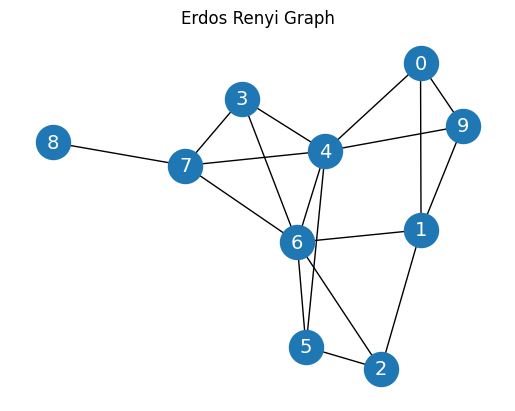

In [28]:
graph = nx.erdos_renyi_graph(10, 0.3, seed=1)
GraphVisualizer.plot_graph(graph, "Erdos Renyi Graph")

In [29]:
text_processor = TextProcessor(text, CONTEXT_SIZE)                              # Initialize the TextProcessor with the provided text and context size.
text_processor.display_skipgrams()                                              # Display a sample of generated skipgram pairs from the text.
text_processor.display_vocab_size()                                             # Print the size of the vocabulary extracted from the text.
embedding_model = WordEmbeddingModel([text])                                    # Initialize the WordEmbeddingModel with the given text sentences.
embedding_model.train_model([text])                                             # Train the Word2Vec model using the provided text sentences.
embedding_model.display_word_embedding()                                        # Display the embedding vector of the first word in the vocabulary.
embedding_model.display_embedding_shape()                                       # Print the shape of the embedding matrix generated by the Word2Vec model.
walker = RandomWalker(graph)                                                    # Initialize the RandomWalker with the provided graph.
print("\nRandom walk starting from node 0:", walker.random_walk(0, 10))         # Perform a random walk starting from node 0 with a length of 10 steps and print the result.


[('dolor', ['Lorem', 'ipsum', 'sit', 'amet,']), ('sit', ['ipsum', 'dolor', 'amet,', 'consectetur'])]
Length of vocabulary = 121

Word embedding =
[ 0.07156403  0.03257632  0.00209916 -0.04374931 -0.03398107 -0.08656936
 -0.09047253 -0.0955243  -0.06482638  0.0660186 ]
Shape of embedding matrix: (121, 10)

Random walk starting from node 0: ['0', '1', '9', '1', '0', '4', '6', '7', '6', '5', '6']


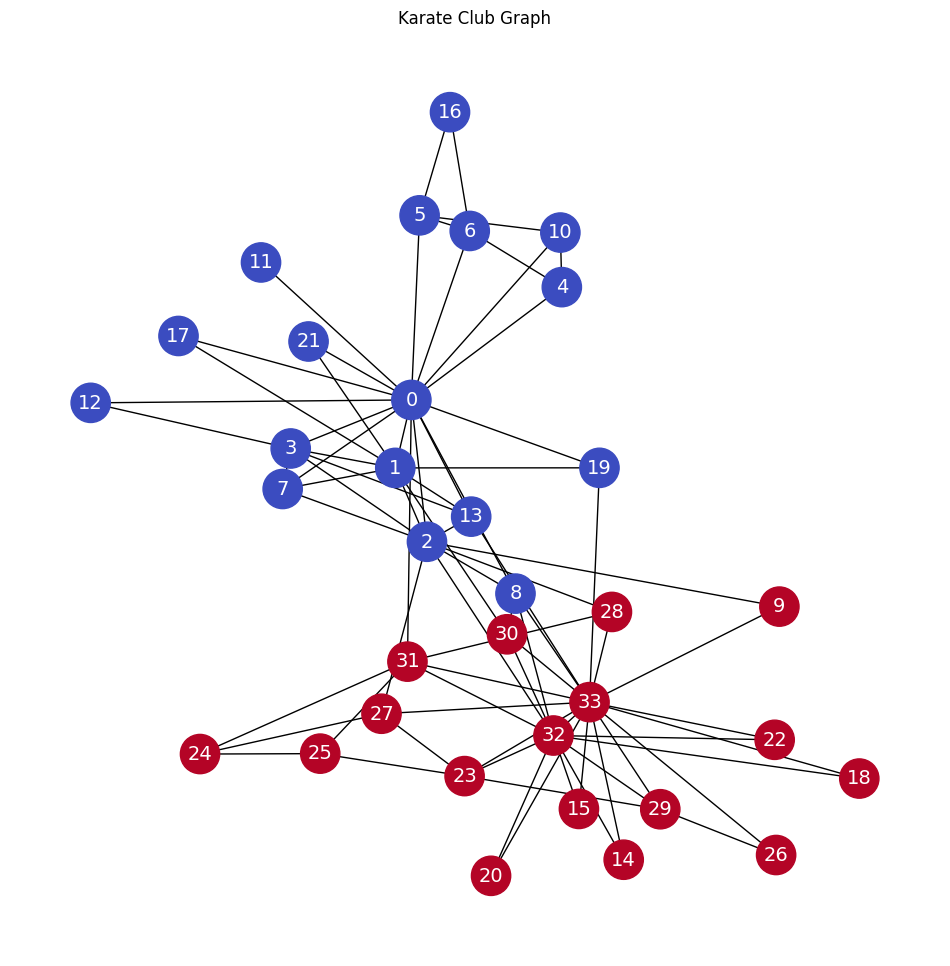

In [30]:
karate_club_graph = nx.karate_club_graph()
karate_labels = [1 if karate_club_graph.nodes[node]['club'] == 'Officer' else 0 for node in karate_club_graph.nodes]
GraphVisualizer.plot_karate_club_graph(karate_club_graph, karate_labels)

In [31]:
karate_walker = RandomWalker(karate_club_graph)                                 # Initialize the RandomWalker with the Karate Club graph.
walks = karate_walker.generate_walks()                                          # Generate random walks for the Karate Club graph.
print("\nFirst random walk:", walks[0])                                         # Print the first random walk generated from the Karate Club graph.

walks_embedding_model = WordEmbeddingModel(walks, vector_size=100, window=10)   # Initialize the WordEmbeddingModel with the generated walks, setting vector size and window parameters.
walks_embedding_model.model.build_vocab(walks)                                  # Build vocabulary for the Word2Vec model using the generated walks.
walks_embedding_model.train_model(walks, epochs=30)                             # Train the Word2Vec model on the generated walks for 30 epochs.
walks_embedding_model.display_embedding_shape()                                 # Print the shape of the embedding matrix after training.

print('\nNodes that are the most similar to node 0:')                           # Print the most similar nodes to node 0 based on the learned embeddings.
for similarity in walks_embedding_model.model.wv.most_similar(positive=['0']):
    print(f'   {similarity}')



First random walk: ['0', '10', '0', '17', '0', '2', '13', '0', '2', '9', '33']
Shape of embedding matrix: (34, 100)

Nodes that are the most similar to node 0:
   ('4', 0.7342758178710938)
   ('10', 0.7246410846710205)
   ('21', 0.7014100551605225)
   ('5', 0.6937763094902039)
   ('6', 0.6823571920394897)
   ('7', 0.6677577495574951)
   ('16', 0.661172091960907)
   ('1', 0.6518846750259399)
   ('12', 0.6399403810501099)
   ('11', 0.6385901570320129)


In [32]:
print(f"\nSimilarity between node 0 and 4: {walks_embedding_model.model.wv.similarity('0', '4')}")
nodes_wv = np.array([walks_embedding_model.model.wv.get_vector(str(i)) for i in range(len(walks_embedding_model.model.wv))])
tsne = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=0)


Similarity between node 0 and 4: 0.7342758178710938


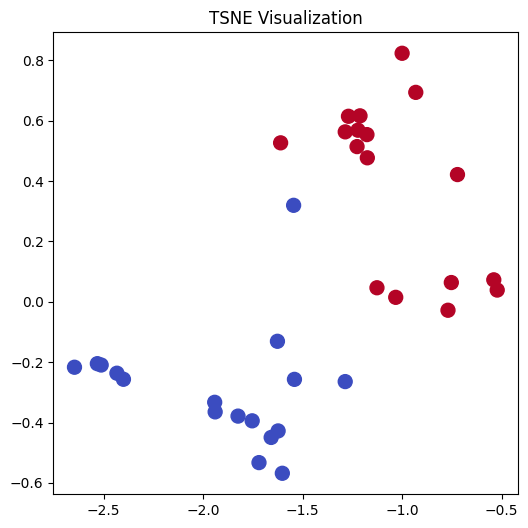


Accuracy = 95.45%


In [33]:
# Apply TSNE to reduce dimensionality of node embeddings and obtain 2D representation.
tsne_result = tsne.fit_transform(nodes_wv)

# Create a scatter plot of the TSNE results with nodes colored by their labels.
plt.figure(figsize=(6, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=100, c=karate_labels, cmap="coolwarm")
plt.title("TSNE Visualization")
plt.show()

# Define training and test masks for node classification.
train_mask = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
test_mask = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33]

# Convert node embeddings and labels to NumPy arrays.
nodes_wv = np.array([walks_embedding_model.model.wv.get_vector(str(i)) for i in range(len(walks_embedding_model.model.wv))])
karate_labels = np.array(karate_labels)

# Initialize and train a RandomForestClassifier with training data.
clf = RandomForestClassifier(random_state=0)
clf.fit(nodes_wv[train_mask], karate_labels[train_mask])

# Predict labels for the test set and calculate the accuracy of the classifier.
y_pred = clf.predict(nodes_wv[test_mask])
acc = accuracy_score(karate_labels[test_mask], y_pred)
print(f'\nAccuracy = {acc*100:.2f}%')
